In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [360]:
covtype_df = pd.read_csv("covtype_data.csv")
covtype_df

,Elevation,Aspect,Slope,HorDistHydro,VerDistHydro,HorDistRoad,HS9am,HSnoon,HS3pm,HorDistFire,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,CoverType
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [14]:
means_df = covtype_df.groupby("CoverType").mean()
means_df

,Elevation,Aspect,Slope,HorDistHydro,VerDistHydro,HorDistRoad,HS9am,HSnoon,HS3pm,HorDistFire,...,ST31,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40
CoverType,,,,,,,,,,,,,,,,,,,,,
1,3128.644888,156.138227,13.127110,270.555245,42.156939,2614.834517,211.998782,223.430211,143.875038,2009.253517,...,0.056000,0.100821,0.085668,0.000444,0.004395,0.000066,0.000000,0.041206,0.037207,0.022781
2,2920.936061,152.060515,13.550499,279.916442,45.884219,2429.530799,213.844423,225.326596,142.983466,2168.154849,...,0.046625,0.104327,0.089333,0.005051,0.000042,0.000148,0.000000,0.002612,0.001264,0.001172
3,2394.509845,176.372490,20.770208,210.276473,62.446915,943.940734,201.918415,215.826537,140.367176,910.955949,...,0.000000,0.002965,0.000140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2223.939934,137.139425,18.528941,106.934838,41.186749,914.199490,228.345832,216.997088,111.392792,859.124135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2787.417571,139.283051,16.641315,212.354893,50.610344,1349.765722,223.474876,219.035816,121.920889,1577.719794,...,0.032550,0.048457,0.054567,0.002107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2419.181897,180.539068,19.048886,159.853458,45.437439,1037.169805,192.844302,209.827662,148.284044,1055.351471,...,0.003628,0.011516,0.031036,0.000864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3361.928669,153.236226,14.255924,356.994686,69.474305,2738.250463,216.967723,221.746026,134.932033,2070.031594,...,0.010824,0.040907,0.031009,0.002487,0.046221,0.003072,0.014529,0.297611,0.271380,0.175134


## Distributions:

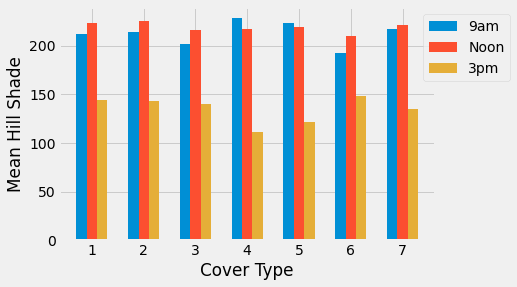

In [167]:
indexes = np.arange(1, 8)

plt.bar(indexes - 0.2, means_df.HS9am, width=0.2, label='9am')
plt.bar(indexes, means_df.HSnoon, width=0.2, label='Noon')
plt.bar(indexes + 0.2, means_df.HS3pm, width=0.2, label='3pm')
plt.legend(bbox_to_anchor=[0.95,1])
plt.xlabel('Cover Type')
plt.ylabel('Mean Hill Shade');

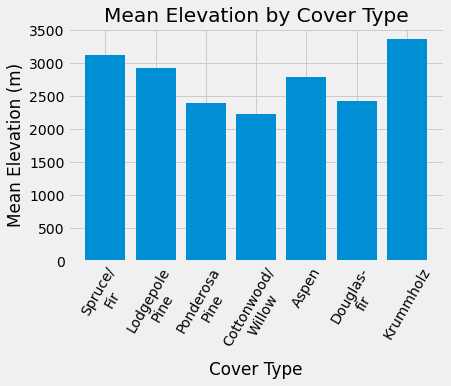

In [468]:
cover_types = ['Spruce/\nFir','Lodgepole\nPine','Ponderosa\nPine','Cottonwood/\nWillow','Aspen', \
               'Douglas-\nfir','Krummholz']

plt.bar(cover_types, means_df.Elevation)
plt.xticks(rotation=60)
plt.xlabel('Cover Type')
plt.ylabel('Mean Elevation (m)')
plt.title('Mean Elevation by Cover Type');

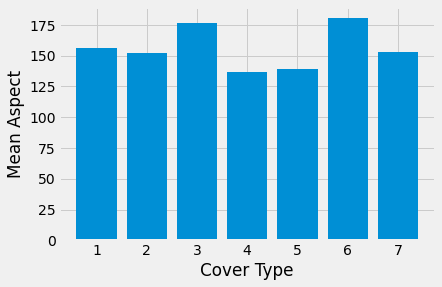

In [25]:
plt.bar(means_df.index, means_df.Aspect)
plt.xlabel('Cover Type')
plt.ylabel('Mean Aspect');

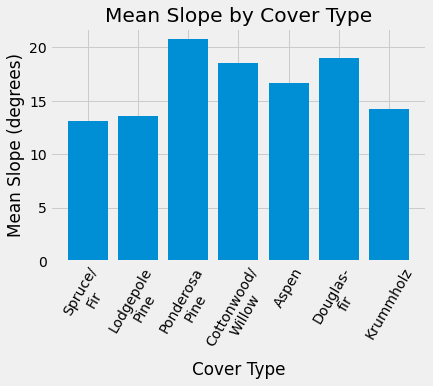

In [469]:
plt.bar(cover_types, means_df.Slope)
plt.xticks(rotation=60)
plt.xlabel('Cover Type')
plt.ylabel('Mean Slope (degrees)')
plt.title('Mean Slope by Cover Type');

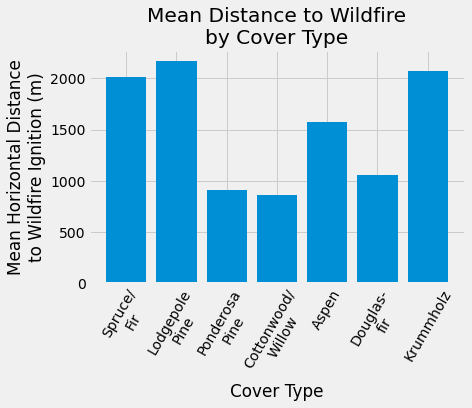

In [509]:
plt.bar(cover_types, means_df.HorDistFire)
plt.xticks(rotation=60)
plt.xlabel('Cover Type')
plt.ylabel('Mean Horizontal Distance\nto Wildfire Ignition (m)')
plt.title('Mean Distance to Wildfire\nby Cover Type');

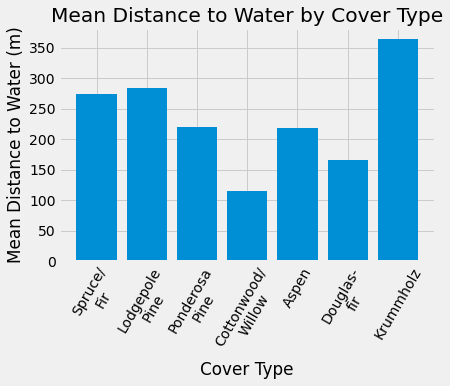

In [470]:
def euclidean_dist(xs, ys):
    distances = []
    for (x, y) in zip(xs, ys):
        distances.append(np.sqrt(x**2 + y**2))
    return distances

water_distances = euclidean_dist(means_df.HorDistHydro, means_df.VerDistHydro)

plt.bar(cover_types, water_distances)
plt.xticks(rotation=60)
plt.xlabel('Cover Type')
plt.ylabel('Mean Distance to Water (m)')
plt.title('Mean Distance to Water by Cover Type');

In [60]:
covtype_soil_df = covtype_df.copy()
covtype_soil_df['WA'] = covtype_soil_df['WA1']

for i in range(len(covtype_soil_df)):
    row = covtype_soil_df.iloc[i]
    if row.WA2 == 1:
        covtype_soil_df.loc[i, 'WA'] = 2
    elif row.WA3 == 1:
        covtype_soil_df.loc[i, 'WA'] = 3
    elif row.WA4 == 1:
        covtype_soil_df.loc[i, 'WA'] = 4
        
covtype_soil_df

,Elevation,Aspect,Slope,HorDistHydro,VerDistHydro,HorDistRoad,HS9am,HSnoon,HS3pm,HorDistFire,...,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,CoverType,WA
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,3,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,3,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,3,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,3,3


In [67]:
covtype_soil_df = covtype_soil_df.drop(columns=['WA1', 'WA2', 'WA3', 'WA4'])

In [68]:
WA_means_df = covtype_soil_df.groupby("WA").mean()
WA_means_df

,Elevation,Aspect,Slope,HorDistHydro,VerDistHydro,HorDistRoad,HS9am,HSnoon,HS3pm,HorDistFire,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,CoverType
WA,,,,,,,,,,,,,,,,,,,,,
1,3000.267286,138.280273,12.157292,246.553333,34.745744,3134.408055,218.117199,223.948017,137.644385,2538.703600,...,0.000000,0.000000,0.000000,0.002515,0.00000,0.00089,0.028785,0.025913,0.016676,1.735928
2,3245.727814,182.565118,12.937893,320.294104,44.238690,1008.166477,211.435484,226.917581,148.232967,2136.523524,...,0.125853,0.094264,0.000000,0.016832,0.00000,0.00000,0.069368,0.031154,0.070004,1.763251
3,2980.554471,165.189549,15.173786,298.923272,56.153171,1937.118438,209.084606,224.412320,146.478482,1562.401351,...,0.192442,0.167100,0.006358,0.002889,0.00047,0.00026,0.023654,0.024143,0.009113,2.157627
4,2294.106038,191.156406,21.443438,187.536221,63.815733,733.017123,191.578040,208.474870,145.297501,778.649021,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,3.782947


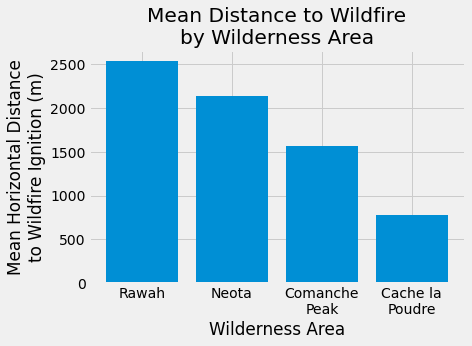

In [506]:
wild_areas = ['Rawah','Neota', 'Comanche\nPeak','Cache la\nPoudre']

plt.bar(wild_areas, WA_means_df.HorDistFire)
plt.xlabel('Wilderness Area')
plt.ylabel('Mean Horizontal Distance\nto Wildfire Ignition (m)')
plt.title('Mean Distance to Wildfire\nby Wilderness Area');

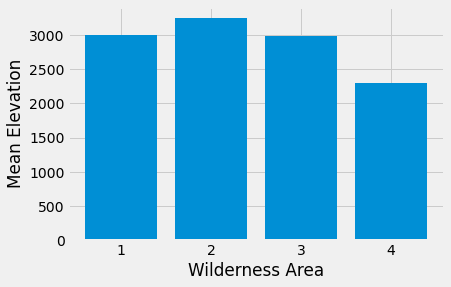

In [69]:
plt.bar(WA_means_df.index, WA_means_df.Elevation)
plt.xlabel('Wilderness Area')
plt.ylabel('Mean Elevation');

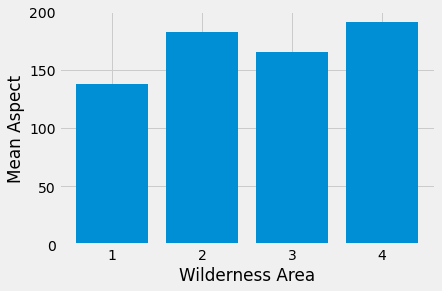

In [70]:
plt.bar(WA_means_df.index, WA_means_df.Aspect)
plt.xlabel('Wilderness Area')
plt.ylabel('Mean Aspect');

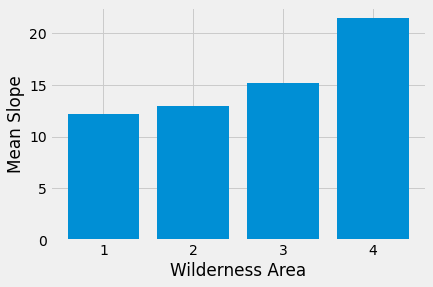

In [71]:
plt.bar(WA_means_df.index, WA_means_df.Slope)
plt.xlabel('Wilderness Area')
plt.ylabel('Mean Slope');

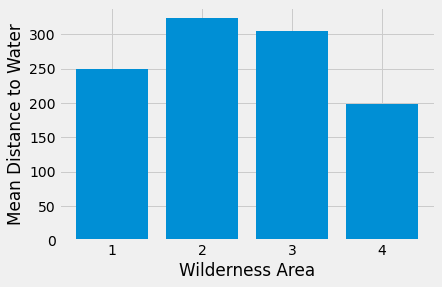

In [72]:
water_distances2 = euclidean_dist(WA_means_df.HorDistHydro, WA_means_df.VerDistHydro)

plt.bar(WA_means_df.index, water_distances2)
plt.xlabel('Wilderness Area')
plt.ylabel('Mean Distance to Water');

In [75]:
wa_covtype_df = covtype_soil_df.groupby(['CoverType', 'WA']).mean()
wa_covtype_df

Elevation      Aspect      Slope  HorDistHydro  VerDistHydro  \
CoverType WA                                                                   
1         1   3122.768514  137.153854  12.506541    238.504432     33.492012   
          2   3236.455284  194.033342  13.160796    307.528959     46.972896   
          3   3112.838497  171.017023  13.869482    301.411537     51.599374   
2         1   2906.875702  140.508369  11.653721    255.350459     35.187241   
          2   3214.070562  165.951029  12.243851    339.307401     33.323651   
          3   2927.173191  162.988816  15.783673    306.886069     59.124124   
          4   2472.009253  217.172505  16.752479    175.532386     52.659947   
3         3   2574.476503  154.475175  17.684685    222.958112     48.760070   
          4   2274.554442  190.967978  22.826839    201.823623     71.569777   
4         4   2223.939934  137.139425  18.528941    106.934838     41.186749   
5         1   2767.827823  100.620471  19.623645    175.288019     47.813277   
          3   2800.384804  164.875350  14.667192    236.890931     52.461835   
6         3   2569.259638  157.312484  16.970889    130.890506     31.198400   
          4   2301.689560  198.722616  20.675701    182.527872     56.584848   
7         1   3310.394825  125.681239  13.817487    214.059008     38.389531   
          2   3444.019097  154.798611  13.845486    349.171441     64.737413   
          3   3367.555361  163.687066  14.498741    414.006486     82.406562   

              HorDistRoad       HS9am      HSnoon       HS3pm  HorDistFire  \
CoverType WA                                                                 
1         1   3211.053322  216.644910  222.663592  137.801054  2287.668341   
          2   1015.838397  208.265340  227.380264  152.340360  2119.367787   
          3   2234.417615  207.180308  223.516966  149.412816  1649.588555   
2         1   3138.782697  218.600375  225.522295  139.124996  2735.391547   
          2    920.638731  217.317418  227.801781  142.580412  2369.702949   
          3   1754.441360  208.616054  225.053240  147.013446  1524.178091   
          4    551.096827  189.892597  219.822538  164.000000   786.056841   
3         3   1323.803077  220.736154  230.306853  135.010070  1162.655245   
          4    690.746388  189.375594  206.174793  143.937914   743.187704   
4         4    914.199490  228.345832  216.997088  111.392792   859.124135   
5         1   1031.925681  233.620206  203.665961   91.307855  1832.019572   
          3   1560.156688  216.759279  229.209734  142.184874  1409.388655   
6         3   1299.835956  200.841201  212.657488  143.482166  1340.960268   
          4    831.534647  186.583718  207.612257  152.043322   831.755056   
7         1   2978.991178  223.290727  220.481474  126.308371  2627.995687   
          2   1287.583767  214.082899  219.735243  137.126736  1365.644097   
          3   2899.587180  215.013735  222.591759  137.902862  1976.688134   

              ...      ST31      ST32      ST33      ST34      ST35      ST36  \
CoverType WA  ...                                                               
1         1   ...  0.000000  0.000000  0.000000  0.000000  0.003585  0.000000   
          2   ...  0.022909  0.115676  0.117021  0.000000  0.024845  0.000000   
          3   ...  0.130667  0.219438  0.182479  0.001074  0.001028  0.000160   
2         1   ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          2   ...  0.000000  0.179188  0.068225  0.000000  0.001336  0.000000   
          3   ...  0.105593  0.223402  0.197413  0.011439  0.000000  0.000336   
          4   ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3         3   ...  0.000000  0.007413  0.000350  0.000000  0.000000  0.000000   
          4   ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4         4   ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5         1   ...  0.000000  0.000000  0

In [123]:
field = 'Elevation'

wa1_elev = [wa_covtype_df.loc[(1, 1), field], wa_covtype_df.loc[(2, 1), field], 0, 0, \
            wa_covtype_df.loc[(5, 1), field], 0, wa_covtype_df.loc[(7, 1), field]]
wa2_elev = [wa_covtype_df.loc[(1, 2), field], wa_covtype_df.loc[(2, 2), field], 0, 0, 0, 0, \
            wa_covtype_df.loc[(7, 2), field]]
wa3_elev = [wa_covtype_df.loc[(1, 3), field], wa_covtype_df.loc[(2, 3), field], \
            wa_covtype_df.loc[(3, 3), field], 0, wa_covtype_df.loc[(5, 3), field], \
            wa_covtype_df.loc[(6, 3), field], wa_covtype_df.loc[(7, 3), field]]
wa4_elev = [0, wa_covtype_df.loc[(2, 4), field], wa_covtype_df.loc[(3, 4), field], \
            wa_covtype_df.loc[(4, 4), field], 0, wa_covtype_df.loc[(6, 4), field], 0]

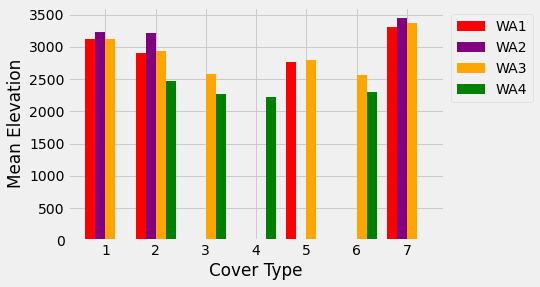

In [124]:
indexes = np.arange(1, 8)

plt.bar(indexes - 0.3, wa1_elev, width=0.2, color='red', label='WA1')
plt.bar(indexes - 0.1, wa2_elev, width=0.2, color='purple', label='WA2')
plt.bar(indexes + 0.1, wa3_elev, width=0.2, color='orange', label='WA3')
plt.bar(indexes + 0.3, wa4_elev, width=0.2, color='green', label='WA4')
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel('Cover Type')
plt.ylabel('Mean Elevation');

In [125]:
field = 'Aspect'

wa1_asp = [wa_covtype_df.loc[(1, 1), field], wa_covtype_df.loc[(2, 1), field], 0, 0, \
          wa_covtype_df.loc[(5, 1), field], 0, wa_covtype_df.loc[(7, 1), field]]
wa2_asp = [wa_covtype_df.loc[(1, 2), field], wa_covtype_df.loc[(2, 2), field], 0, 0, 0, 0, \
          wa_covtype_df.loc[(7, 2), field]]
wa3_asp = [wa_covtype_df.loc[(1, 3), field], wa_covtype_df.loc[(2, 3), field], \
          wa_covtype_df.loc[(3, 3), field], 0, wa_covtype_df.loc[(5, 3), field], \
          wa_covtype_df.loc[(6, 3), field], wa_covtype_df.loc[(7, 3), field]]
wa4_asp = [0, wa_covtype_df.loc[(2, 4), field], wa_covtype_df.loc[(3, 4), field], \
          wa_covtype_df.loc[(4, 4), field], 0, wa_covtype_df.loc[(6, 4), field], 0]

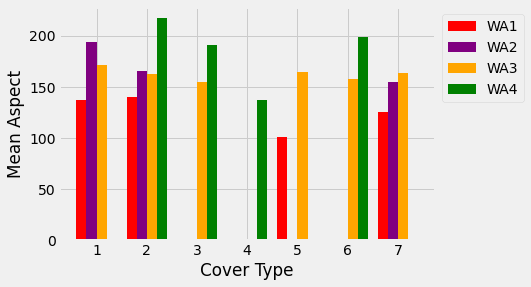

In [126]:
indexes = np.arange(1, 8)

plt.bar(indexes - 0.3, wa1_asp, width=0.2, color='red', label='WA1')
plt.bar(indexes - 0.1, wa2_asp, width=0.2, color='purple', label='WA2')
plt.bar(indexes + 0.1, wa3_asp, width=0.2, color='orange', label='WA3')
plt.bar(indexes + 0.3, wa4_asp, width=0.2, color='green', label='WA4')
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel('Cover Type')
plt.ylabel('Mean Aspect');

In [128]:
field = 'Slope'

wa1_slope = [wa_covtype_df.loc[(1, 1), field], wa_covtype_df.loc[(2, 1), field], 0, 0, \
            wa_covtype_df.loc[(5, 1), field], 0, wa_covtype_df.loc[(7, 1), field]]
wa2_slope = [wa_covtype_df.loc[(1, 2), field], wa_covtype_df.loc[(2, 2), field], 0, 0, 0, 0, \
            wa_covtype_df.loc[(7, 2), field]]
wa3_slope = [wa_covtype_df.loc[(1, 3), field], wa_covtype_df.loc[(2, 3), field], \
            wa_covtype_df.loc[(3, 3), field], 0, wa_covtype_df.loc[(5, 3), field], \
            wa_covtype_df.loc[(6, 3), field], wa_covtype_df.loc[(7, 3), field]]
wa4_slope = [0, wa_covtype_df.loc[(2, 4), field], wa_covtype_df.loc[(3, 4), field], \
            wa_covtype_df.loc[(4, 4), field], 0, wa_covtype_df.loc[(6, 4), field], 0]

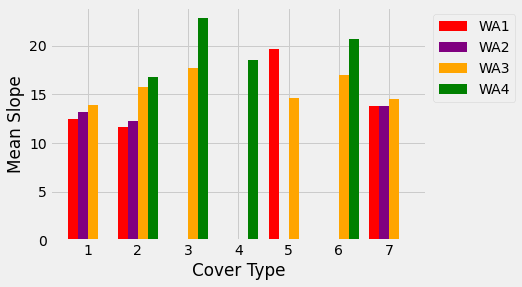

In [129]:
indexes = np.arange(1, 8)

plt.bar(indexes - 0.3, wa1_slope, width=0.2, color='red', label='WA1')
plt.bar(indexes - 0.1, wa2_slope, width=0.2, color='purple', label='WA2')
plt.bar(indexes + 0.1, wa3_slope, width=0.2, color='orange', label='WA3')
plt.bar(indexes + 0.3, wa4_slope, width=0.2, color='green', label='WA4')
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel('Cover Type')
plt.ylabel('Mean Slope');

In [130]:
WAcov_count_df = covtype_soil_df.groupby(['CoverType', 'WA']).count()
WAcov_count_df

Elevation  Aspect   Slope  HorDistHydro  VerDistHydro  \
CoverType WA                                                          
1         1      105717  105717  105717        105717        105717   
          2       18595   18595   18595         18595         18595   
          3       87528   87528   87528         87528         87528   
2         1      146197  146197  146197        146197        146197   
          2        8985    8985    8985          8985          8985   
          3      125093  125093  125093        125093        125093   
          4        3026    3026    3026          3026          3026   
3         3       14300   14300   14300         14300         14300   
          4       21454   21454   21454         21454         21454   
4         4        2747    2747    2747          2747          2747   
5         1        3781    3781    3781          3781          3781   
          3        5712    5712    5712          5712          5712   
6         3        7626    7626    7626          7626          7626   
          4        9741    9741    9741          9741          9741   
7         1        5101    5101    5101          5101          5101   
          2        2304    2304    2304          2304          2304   
          3       13105   13105   13105         13105         13105   

              HorDistRoad   HS9am  HSnoon   HS3pm  HorDistFire  ...    ST31  \
CoverType WA                                                    ...           
1         1        105717  105717  105717  105717       105717  ...  105717   
          2         18595   18595   18595   18595        18595  ...   18595   
          3         87528   87528   87528   87528        87528  ...   87528   
2         1        146197  146197  146197  146197       146197  ...  146197   
          2          8985    8985    8985    8985         8985  ...    8985   
          3        125093  125093  125093  125093       125093  ...  125093   
          4          3026    3026    3026    3026         3026  ...    3026   
3         3         14300   14300   14300   14300        14300  ...   14300   
          4         21454   21454   21454   21454        21454  ...   21454   
4         4          2747    2747    2747    2747         2747  ...    2747   
5         1          3781    3781    3781    3781         3781  ...    3781   
          3          5712    5712    5712    5712         5712  ...    5712   
6         3          7626    7626    7626    7626         7626  ...    7626   
          4          9741    9741    9741    9741         9741  ...    9741   
7         1          5101    5101    5101    5101         5101  ...    5101   
          2          2304    2304    2304    2304         2304  ...    2304   
          3         13105   13105   13105   13105        13105  ...   13105   

                ST32    ST33    ST34    ST35    ST36    ST37    ST38    ST39  \
CoverType WA                                                                   
1         1   105717  105717  105717  105717  105717  105717  105717  105717   
          2    18595   18595   18595   18595   18595   18595   18595   18595   
          3    87528   87528   87528   87528   87528   87528   87528   87528   
2         1   146197  146197  146197  146197  146197  146197  146197  146197   
          2     8985    8985    8985    8985    8985    8985    8985    8985   
          3   125093  125093  125093  125093  125093  125093  125093  125093   
          4     3026    3026    3026    3026    3026    3026    3026    3026   
3         3    14300   14300   14300   14300   14300   14300   14300   14300   
          4    21454   21454   21454   21454   21454   21454   21454   21454   
4         4     2747    2747    2747    2747    2747    2747    2747    2747   
5         1     3781    3781    3781    3781    3781    3781    3781    3781   
          3     5712    5712    5712    5712    5712    5712    5712    5712   
6         3     7626    7626    7626    76

In [131]:
field = 'Elevation'

wa1_count = [WAcov_count_df.loc[(1, 1), field], WAcov_count_df.loc[(2, 1), field], 0, 0, \
            WAcov_count_df.loc[(5, 1), field], 0, WAcov_count_df.loc[(7, 1), field]]
wa2_count = [WAcov_count_df.loc[(1, 2), field], WAcov_count_df.loc[(2, 2), field], 0, 0, 0, 0, \
            WAcov_count_df.loc[(7, 2), field]]
wa3_count = [WAcov_count_df.loc[(1, 3), field], WAcov_count_df.loc[(2, 3), field], \
            WAcov_count_df.loc[(3, 3), field], 0, WAcov_count_df.loc[(5, 3), field], \
            WAcov_count_df.loc[(6, 3), field], WAcov_count_df.loc[(7, 3), field]]
wa4_count = [0, WAcov_count_df.loc[(2, 4), field], WAcov_count_df.loc[(3, 4), field], \
            WAcov_count_df.loc[(4, 4), field], 0, WAcov_count_df.loc[(6, 4), field], 0]

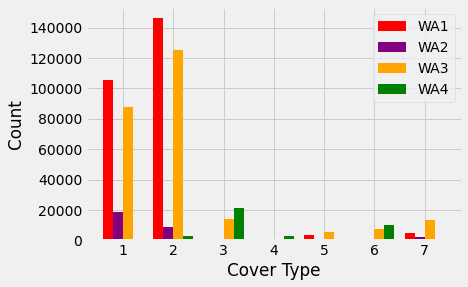

In [133]:
indexes = np.arange(1, 8)

plt.bar(indexes - 0.3, wa1_count, width=0.2, color='red', label='WA1')
plt.bar(indexes - 0.1, wa2_count, width=0.2, color='purple', label='WA2')
plt.bar(indexes + 0.1, wa3_count, width=0.2, color='orange', label='WA3')
plt.bar(indexes + 0.3, wa4_count, width=0.2, color='green', label='WA4')
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel('Cover Type')
plt.ylabel('Count');

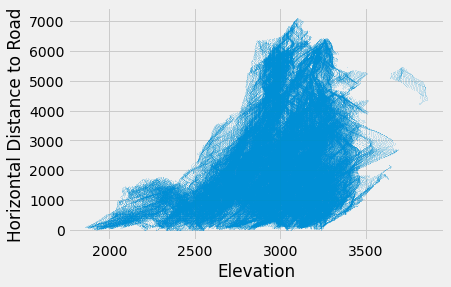

In [356]:
sample = covtype_df

plt.scatter(sample.Elevation, sample.HorDistRoad, s=0.01)
plt.xlabel('Elevation')
plt.ylabel('Horizontal Distance to Road');

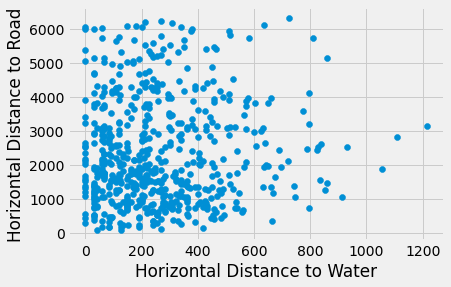

In [155]:
sample = covtype_df.sample(frac=0.001)

plt.scatter(sample.HorDistHydro, sample.HorDistRoad)
plt.xlabel('Horizontal Distance to Water')
plt.ylabel('Horizontal Distance to Road');

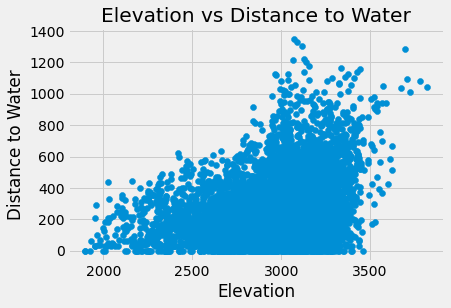

In [344]:
sample = covtype_df.sample(frac=0.01)

water_distances = euclidean_dist(sample.HorDistHydro, sample.VerDistHydro)

plt.scatter(sample.Elevation, water_distances)
plt.xlabel('Elevation')
plt.ylabel('Distance to Water')
plt.title('Elevation vs Distance to Water');

In [348]:
ct_means_df = covtype_soil_df.groupby(['CoverType']).mean()
ct_means_df

,Elevation,Aspect,Slope,HorDistHydro,VerDistHydro,HorDistRoad,HS9am,HSnoon,HS3pm,HorDistFire,...,ST32,ST33,ST34,ST35,ST36,ST37,ST38,ST39,ST40,WA
CoverType,,,,,,,,,,,,,,,,,,,,,
1,3128.644888,156.138227,13.127110,270.555245,42.156939,2614.834517,211.998782,223.430211,143.875038,2009.253517,...,0.100821,0.085668,0.000444,0.004395,0.000066,0.000000,0.041206,0.037207,0.022781,1.914138
2,2920.936061,152.060515,13.550499,279.916442,45.884219,2429.530799,213.844423,225.326596,142.983466,2168.154849,...,0.104327,0.089333,0.005051,0.000042,0.000148,0.000000,0.002612,0.001264,0.001172,1.946869
3,2394.509845,176.372490,20.770208,210.276473,62.446915,943.940734,201.918415,215.826537,140.367176,910.955949,...,0.002965,0.000140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600045
4,2223.939934,137.139425,18.528941,106.934838,41.186749,914.199490,228.345832,216.997088,111.392792,859.124135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
5,2787.417571,139.283051,16.641315,212.354893,50.610344,1349.765722,223.474876,219.035816,121.920889,1577.719794,...,0.048457,0.054567,0.002107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.203413
6,2419.181897,180.539068,19.048886,159.853458,45.437439,1037.169805,192.844302,209.827662,148.284044,1055.351471,...,0.011516,0.031036,0.000864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.560891
7,3361.928669,153.236226,14.255924,356.994686,69.474305,2738.250463,216.967723,221.746026,134.932033,2070.031594,...,0.040907,0.031009,0.002487,0.046221,0.003072,0.014529,0.297611,0.271380,0.175134,2.390249


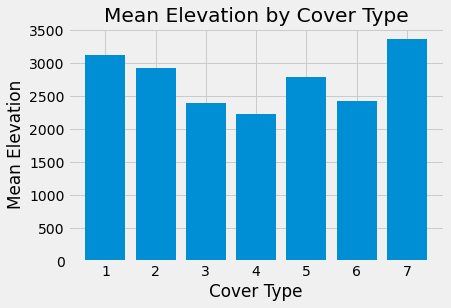

In [350]:
plt.bar(ct_means_df.index, ct_means_df.Elevation)
plt.xlabel('Cover Type')
plt.ylabel('Mean Elevation')
plt.title('Mean Elevation by Cover Type');

## Correlations:

In [242]:
corrs_df = covtype_df.corr()

In [250]:
# 10 strongest correlations between Elevation and other variables
abs(corrs_df.Elevation).sort_values(ascending=False)[1:11]

WA4             0.619374
ST10            0.428746
HorDistRoad     0.365559
HorDistHydro    0.306229
CoverType       0.269554
Slope           0.242697
WA2             0.238164
ST38            0.217179
ST6             0.214606
ST40            0.212612
Name: Elevation, dtype: float64

In [248]:
# 10 strongest correlations between ST29 and other variables
abs(corrs_df.ST29).sort_values(ascending=False)[1:11]

WA1            0.550549
WA3            0.437421
HorDistRoad    0.306324
HorDistFire    0.215194
ST23           0.165256
ST32           0.156809
ST33           0.144396
WA4            0.129666
CoverType      0.124933
ST22           0.122795
Name: ST29, dtype: float64

In [249]:
# 10 strongest correlations between W4 and other variables
abs(corrs_df.WA4).sort_values(ascending=False)[1:11]

Elevation      0.619374
ST10           0.485031
ST6            0.410422
CoverType      0.323200
ST1            0.277805
HorDistRoad    0.270349
Slope          0.255503
HorDistFire    0.236548
WA1            0.235247
WA3            0.229226
Name: WA4, dtype: float64

In [223]:
# create dataframe with covertypes separated into indicator variables
i_covtype_df = covtype_df.copy()
i_covtype_df['CT1'] = covtype_df.CoverType.apply(lambda x: 1 if x==1 else 0)
i_covtype_df['CT2'] = covtype_df.CoverType.apply(lambda x: 1 if x==2 else 0)
i_covtype_df['CT3'] = covtype_df.CoverType.apply(lambda x: 1 if x==3 else 0)
i_covtype_df['CT4'] = covtype_df.CoverType.apply(lambda x: 1 if x==4 else 0)
i_covtype_df['CT5'] = covtype_df.CoverType.apply(lambda x: 1 if x==5 else 0)
i_covtype_df['CT6'] = covtype_df.CoverType.apply(lambda x: 1 if x==6 else 0)
i_covtype_df['CT7'] = covtype_df.CoverType.apply(lambda x: 1 if x==7 else 0)

In [225]:
i_covtype_df.head(10)

,Elevation,Aspect,Slope,HorDistHydro,VerDistHydro,HorDistRoad,HS9am,HSnoon,HS3pm,HorDistFire,...,ST39,ST40,CoverType,CT1,CT2,CT3,CT4,CT5,CT6,CT7
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,5,0,0,0,0,1,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,5,0,0,0,0,1,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,2,0,1,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,2,0,1,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,5,0,0,0,0,1,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,2,0,1,0,0,0,0,0
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,5,0,0,0,0,1,0,0
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,5,0,0,0,0,1,0,0
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,5,0,0,0,0,1,0,0
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,5,0,0,0,0,1,0,0


In [254]:
# calculate correlations for i_covtype_df
i_corrs_df = i_covtype_df.corr()

In [275]:
# 10 strongest correlations between CT1 and other variables
tmp_corrs = i_corrs_df.drop(index=['CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'CT7', 'CoverType'])
top_ct1 = abs(tmp_corrs.CT1).sort_values(ascending=False)[1:11]
top_ct1

Elevation      0.457994
ST22           0.209238
WA4            0.197463
ST23           0.173301
ST10           0.169945
ST12           0.133127
HorDistRoad    0.128590
WA2            0.124642
ST4            0.107342
Slope          0.098792
Name: CT1, dtype: float64

In [276]:
# 10 strongest correlations between CT2 and other variables
tmp_corrs = i_corrs_df.drop(index=['CT1', 'CT3', 'CT4', 'CT5', 'CT6', 'CT7', 'CoverType'])
top_ct2 = abs(tmp_corrs.CT2).sort_values(ascending=False)[1:11]
top_ct2

WA4            0.211598
ST12           0.197150
ST38           0.146113
ST39           0.144098
HorDistFire    0.138394
Elevation      0.133892
WA1            0.131765
ST29           0.131293
ST22           0.130681
ST40           0.111237
Name: CT2, dtype: float64

In [277]:
# 10 strongest correlations between CT3 and other variables
tmp_corrs = i_corrs_df.drop(index=['CT1', 'CT2', 'CT4', 'CT5', 'CT6', 'CT7', 'CoverType'])
top_ct3 = abs(tmp_corrs.CT3).sort_values(ascending=False)[1:11]
top_ct3

WA4            0.562755
Elevation      0.516612
ST4            0.333975
ST10           0.296249
ST2            0.286818
ST6            0.242970
WA1            0.231095
HorDistRoad    0.230937
Slope          0.227971
HorDistFire    0.206787
Name: CT3, dtype: float64

In [278]:
# 10 strongest correlations between CT4 and other variables
tmp_corrs = i_corrs_df.drop(index=['CT1', 'CT2', 'CT3', 'CT5', 'CT6', 'CT7', 'CoverType'])
top_ct4 = abs(tmp_corrs.CT4).sort_values(ascending=False)[1:11]
top_ct4

ST3            0.275208
WA4            0.264405
Elevation      0.181038
ST17           0.137660
ST14           0.118969
ST6            0.068532
HorDistRoad    0.063473
WA1            0.062201
WA3            0.060609
HorDistFire    0.058356
Name: CT4, dtype: float64

In [279]:
# 10 strongest correlations between CT5 and other variables
tmp_corrs = i_corrs_df.drop(index=['CT1', 'CT2', 'CT3', 'CT4', 'CT6', 'CT7', 'CoverType'])
top_ct5 = abs(tmp_corrs.CT5).sort_values(ascending=False)[1:11]
top_ct5

ST30           0.099006
ST17           0.096536
HorDistRoad    0.082687
ST13           0.081988
Elevation      0.079150
HS3pm          0.069390
HS9am          0.054541
ST11           0.044908
Slope          0.043675
WA3            0.043047
Name: CT5, dtype: float64

In [280]:
# 10 strongest correlations between CT6 and other variables
tmp_corrs = i_corrs_df.drop(index=['CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT7', 'CoverType'])
top_ct6 = abs(tmp_corrs.CT6).sort_values(ascending=False)[1:11]
top_ct6

WA4            0.357604
ST10           0.346072
Elevation      0.338662
WA1            0.158412
HorDistRoad    0.147809
HS9am          0.126564
HorDistFire    0.122609
HSnoon         0.119792
Slope          0.115921
ST6            0.110219
Name: CT6, dtype: float64

In [281]:
# 10 strongest correlations between CT7 and other variables
tmp_corrs = i_corrs_df.drop(index=['CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'CoverType'])
top_ct7 = abs(tmp_corrs.CT7).sort_values(ascending=False)[1:11]
top_ct7

ST38            0.320746
ST39            0.310998
Elevation       0.275039
ST40            0.251420
ST35            0.144305
ST37            0.118422
HorDistHydro    0.078808
WA3             0.078262
WA1             0.076980
ST29            0.076325
Name: CT7, dtype: float64

In [358]:
top_corrs = set(list(top_ct1.index) + list(top_ct2.index) + list(top_ct3.index) + list(top_ct4.index) + \
                list(top_ct5.index) + list(top_ct6.index) + list(top_ct7.index))
top_corrs

{'Elevation',
 'HS3pm',
 'HS9am',
 'HSnoon',
 'HorDistFire',
 'HorDistHydro',
 'HorDistRoad',
 'ST10',
 'ST11',
 'ST12',
 'ST13',
 'ST14',
 'ST17',
 'ST2',
 'ST22',
 'ST23',
 'ST29',
 'ST3',
 'ST30',
 'ST35',
 'ST37',
 'ST38',
 'ST39',
 'ST4',
 'ST40',
 'ST6',
 'Slope',
 'WA1',
 'WA2',
 'WA3',
 'WA4'}

## Logistic Regression:

In [473]:
i_covtype_df.head(10)

,Elevation,Aspect,Slope,HorDistHydro,VerDistHydro,HorDistRoad,HS9am,HSnoon,HS3pm,HorDistFire,...,ST39,ST40,CoverType,CT1,CT2,CT3,CT4,CT5,CT6,CT7
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,5,0,0,0,0,1,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,5,0,0,0,0,1,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,2,0,1,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,2,0,1,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,5,0,0,0,0,1,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,2,0,1,0,0,0,0,0
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,5,0,0,0,0,1,0,0
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,5,0,0,0,0,1,0,0
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,5,0,0,0,0,1,0,0
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,5,0,0,0,0,1,0,0


In [498]:
from sklearn.model_selection import train_test_split

X = i_covtype_df[list(top_corrs)]
y = i_covtype_df['CT1']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
X_data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=0)

In [499]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train, y_train)
predictions1 = logReg.predict(x_test)

In [500]:
# CT1 accuracy
np.mean(predictions1==y_test)

0.7676135727993253

In [497]:
from sklearn import preprocessing

# CT2 accuracy
X = i_covtype_df[list(top_corrs)]
y = i_covtype_df['CT2']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
X_data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=0)
logReg = LogisticRegression(max_iter=2000)
logReg.fit(x_train, y_train)
predictions2 = logReg.predict(x_test)

np.mean(predictions2==y_test)

0.7531475091004535

In [501]:
# CT3 accuracy
X = i_covtype_df[list(top_corrs)]
y = i_covtype_df['CT3']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
X_data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=0)
logReg = LogisticRegression(max_iter=2000)
logReg.fit(x_train, y_train)
predictions3 = logReg.predict(x_test)

np.mean(predictions3==y_test)

0.9628925242893901

In [502]:
# CT4 accuracy
X = i_covtype_df[list(top_corrs)]
y = i_covtype_df['CT4']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
X_data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=0)
logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train, y_train)
predictions4 = logReg.predict(x_test)

np.mean(predictions4==y_test)

0.9957746357667185

In [503]:
# CT5 accuracy
X = i_covtype_df[list(top_corrs)]
y = i_covtype_df['CT5']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
X_data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=0)
logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train, y_train)
predictions5 = logReg.predict(x_test)

np.mean(predictions5==y_test)

0.9837353596722976

In [504]:
# CT6 accuracy
X = i_covtype_df[list(top_corrs)]
y = i_covtype_df['CT6']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
X_data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=0)
logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train, y_train)
predictions6 = logReg.predict(x_test)

np.mean(predictions6==y_test)

0.9670490434842474

In [505]:
# CT7 accuracy
X = i_covtype_df[list(top_corrs)]
y = i_covtype_df['CT7']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(X)
X_data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.20, random_state=0)
logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train, y_train)
predictions7 = logReg.predict(x_test)

np.mean(predictions7==y_test)

0.9773155598392468

In [522]:
# create accuracy dataframe
acc_df = pd.DataFrame(
        {'Accuracy':[0.7676135727993253, 0.7531475091004535, 0.9628925242893901, 0.9957746357667185, \
                     0.9837353596722976, 0.9670490434842474, 0.9773155598392468]},
        index=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen', \
               'Douglas-fir','Krummholz'])

acc_df

,Accuracy
Spruce/Fir,0.767614
Lodgepole Pine,0.753148
Ponderosa Pine,0.962893
Cottonwood/Willow,0.995775
Aspen,0.983735
Douglas-fir,0.967049
Krummholz,0.977316


In [519]:
pd.DataFrame({
    'S/F':0.7676,
    'LP':0.7531,
    'PP':0.9629, 
    'C/W':0.9958,
    'ASP':0.9837, 
    'D-f':0.9670, 
    'KZ':0.9773},
    index=['Accuracy'])

,S/F,LP,PP,C/W,ASP,D-f,KZ
Accuracy,0.7676,0.7531,0.9629,0.9958,0.9837,0.967,0.9773


## KNN Classification (all variables):

In [322]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [193]:
# define and scale predictor and outcome data
x_data = covtype_df.drop(['CoverType'],axis=1)
y_data = covtype_df['CoverType']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax, columns=covtype_df.columns[:-1])

In [195]:
# define training/test data, fit classifier to training data, and predict test outcomes
# assumes k = 5 (default)
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [235]:
# visualize outcomes and determine accuracy of predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result, "\n")
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[39402  2648     3     0    35     3   184]
 [ 2157 53901   153     2   203   161    25]
 [    5   175  6748    44     7   290     0]
 [    0     1    94   426     0    25     0]
 [   37   316    27     0  1540     9     0]
 [    8   156   327    16     4  2985     0]
 [  226    38     0     0     2     0  3820]] 

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.93      0.94     42275
           2       0.94      0.95      0.95     56602
           3       0.92      0.93      0.92      7269
           4       0.87      0.78      0.82       546
           5       0.86      0.80      0.83      1929
           6       0.86      0.85      0.86      3496
           7       0.95      0.93      0.94      4086

    accuracy                           0.94    116203
   macro avg       0.91      0.88      0.89    116203
weighted avg       0.94      0.94      0.94    116203

Accuracy: 0.9364818464239305


## KNN Classification (variables with strongest correlations):

In [413]:
# define and scale predictor and outcome data
x_data = covtype_df[list(top_corrs)]
y_data = covtype_df['CoverType']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax, columns=list(top_corrs))

In [421]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)

In [325]:
# define training/test data, fit classifier to training data, and predict test outcomes
# assumes k = 5 (default)
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [326]:
# visualize outcomes and determine accuracy of predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result, "\n")
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[39514  2561     0     0    35     2   163]
 [ 2121 53979   154     0   188   140    20]
 [    2   168  6757    37    12   293     0]
 [    0     1    82   440     0    23     0]
 [   39   311    25     0  1545     9     0]
 [    8   155   318    17     6  2992     0]
 [  205    33     0     0     2     0  3846]] 

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.93      0.94     42275
           2       0.94      0.95      0.95     56602
           3       0.92      0.93      0.93      7269
           4       0.89      0.81      0.85       546
           5       0.86      0.80      0.83      1929
           6       0.86      0.86      0.86      3496
           7       0.95      0.94      0.95      4086

    accuracy                           0.94    116203
   macro avg       0.91      0.89      0.90    116203
weighted avg       0.94      0.94      0.94    116203

Accuracy: 0.9386418595044879


In [352]:
# define training/test data, fit classifier to training data, and predict test outcomes
# k = 7
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [353]:
# visualize outcomes and determine accuracy of predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result, "\n")
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[39302  2751     1     0    35     3   183]
 [ 2162 53913   165     0   179   154    29]
 [    3   180  6723    39    10   314     0]
 [    0     1    87   430     0    28     0]
 [   39   335    29     0  1515    11     0]
 [    8   152   337    17     6  2976     0]
 [  220    34     0     0     2     0  3830]] 

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.93      0.94     42275
           2       0.94      0.95      0.95     56602
           3       0.92      0.92      0.92      7269
           4       0.88      0.79      0.83       546
           5       0.87      0.79      0.82      1929
           6       0.85      0.85      0.85      3496
           7       0.95      0.94      0.94      4086

    accuracy                           0.94    116203
   macro avg       0.91      0.88      0.89    116203
weighted avg       0.94      0.94      0.94    116203

Accuracy: 0.9353372976601293


## KNN Classification with Cross-Validation

In [382]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [398]:
# define and scale predictor and outcome data
train = covtype_df.sample(frac=0.8)
test = covtype_df.drop(train.index)

val1 = train.sample(frac=0.25)
val2 = train.drop(val1.index).sample(frac=(1/3))
val3 = train.drop(val1.index).drop(val2.index).sample(frac=0.5)
val4 = train.drop(val1.index).drop(val2.index).drop(val3.index)

x_test = pd.DataFrame(MinMaxScaler.fit_transform(test[list(top_corrs)]), columns=list(top_corrs))

In [436]:
# define and scale predictor and outcome data (for cross-validation)
x_train1 = train.drop(val1.index)[list(top_corrs)]
x_train1 = pd.DataFrame(MinMaxScaler.fit_transform(x_train1), columns=list(top_corrs))
y_train1 = train.drop(val1.index)['CoverType']

x_train2 = train.drop(val2.index)[list(top_corrs)]
x_train2 = pd.DataFrame(MinMaxScaler.fit_transform(x_train2), columns=list(top_corrs))
y_train2 = train.drop(val2.index)['CoverType']

x_train3 = train.drop(val3.index)[list(top_corrs)]
x_train3 = pd.DataFrame(MinMaxScaler.fit_transform(x_train3), columns=list(top_corrs))
y_train3 = train.drop(val3.index)['CoverType']

x_train4 = train.drop(val4.index)[list(top_corrs)]
x_train4 = pd.DataFrame(MinMaxScaler.fit_transform(x_train4), columns=list(top_corrs))
y_train4 = train.drop(val4.index)['CoverType']

In [440]:
# classify train1 (k=5)
# Note: trains on 3/4 of the training dataset
knn = KNeighborsClassifier()
knn.fit(x_train1, y_train1)
y_pred1 = knn.predict(x_test)

In [530]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# accuracy for train1
acc1 = accuracy_score(test['CoverType'], y_pred1)
acc1

0.9297258222750039

In [453]:
# classify train2 (k=5)
# Note: trains on 3/4 of the training dataset
knn = KNeighborsClassifier()
knn.fit(x_train2, y_train2)
y_pred2 = knn.predict(x_test)

In [531]:
# accuracy for train2
acc2 = accuracy_score(test['CoverType'], y_pred2)
acc2

0.9305433641417532

In [455]:
# classify train3 (k=5)
# Note: trains on 3/4 of the training dataset
knn = KNeighborsClassifier()
knn.fit(x_train3, y_train3)
y_pred3 = knn.predict(x_test)

In [532]:
# accuracy for train3
acc3 = accuracy_score(test['CoverType'], y_pred3)
acc3

0.9292008743395123

In [457]:
# classify train4 (k=5)
# Note: trains on 3/4 of the training dataset
knn = KNeighborsClassifier()
knn.fit(x_train4, y_train4)
y_pred4 = knn.predict(x_test)

In [533]:
# accuracy for train4
acc4 = accuracy_score(test['CoverType'], y_pred4)
acc4

0.9300012047985404

In [535]:
np.mean([acc1, acc2, acc3, acc4])

0.9298678163887024